In [58]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [76]:
z0 = 100
v0 = 55
m = 80
c = 15
g = 9.81
z = lambda t: z0 + (m/c) * (v0 + (m*g/c)) * (1-np.exp(-(c/m)*t)) - (m*g/c) * t
dz = lambda t: -(g*m)/c+np.exp(-(c*t)/m) * ((g*m)/c+v0)
tmax = -m/c * np.log((m*g)/c * 1 / (v0 + (m*g)/c))
print(tmax)
print(z(tmax))

3.831660364845227
192.86086304463106


In [54]:
def golden(f, xl, xr):
    d = xr - xl;
    r = (np.sqrt(5) - 1) / 2.0
    x1 = xl + r*d
    x2 = xr - r*d
    while 1:
        if f(x1) > f(x2):
            xl = x2
            x2 = x1
            d = xr - xl
            x1 = xl + r*d
        else:
            xr = x1
            x1 = x2
            d = xr - xl
            x2 = xr - r*d
        if np.abs(d) < 1.0E-5: break
    # returning the optimal point
    return (x1 + x2) / 2

In [77]:
zGolden = golden(z, 0, 10)
print(zGolden)
print(z(zGolden))

3.831660162690664
192.86086304463075


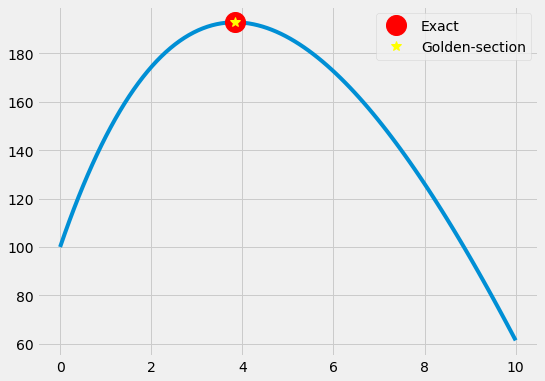

In [73]:
# graphically and analytically
t = np.linspace(0, 10, 100)
fig = plt.figure(1, figsize = (8,6)); plt.clf(); ax = fig.add_subplot(111)
ax.plot(t, z(t))
ax.plot(tmax, z(tmax), 'or', markersize = 20, label = "Exact")
ax.plot(zGolden, z(zGolden), "*", markersize = 10, label = "Golden-section", color = "yellow")
ax.legend()